In [ ]:
########## ONLY in Colab ##########
!pip3 install pyspark

     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 51.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=a83b0561a4c80c37196ba499f747b00246b193426a9e7ac30850da813c73910b
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
# linking with SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Music genre classification with multiple classifiers').getOrCreate()

In [ ]:
########## ONLY in Colab ##########
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')
########## ONLY in Colab ##########

Mounted at /content/drive


In [ ]:
# Load Data from Colab:

########## ONLY in Colab ##########
Music_df = spark.read.option("header", "true").csv("/content/drive/MyDrive/Music_Data")
########## ONLY in Colab ##########

In [ ]:
# Print DF to make sure it is working
Music_df.show()

In [ ]:
# counting the total number of songs per label
df1=Music_df.select('label').groupBy('label').count().orderBy('count', ascending=False)
df1.show()

+---------+-----+
|    label|count|
+---------+-----+
|     jazz| 1100|
|      pop| 1100|
|    metal| 1100|
|    blues| 1100|
|   reggae| 1100|
|    disco| 1099|
|   hiphop| 1098|
|classical| 1098|
|     rock| 1098|
|  country| 1097|
+---------+-----+



In [ ]:
Music_df.na.drop().show()

In [ ]:
# Displaying all numeric columns
classification_df= Music_df.drop('filename','length')
classification_df.show()

In [ ]:
# checking the data types of dataframe
classification_df.printSchema()

root
 |-- chroma_stft_mean: string (nullable = true)
 |-- chroma_stft_var: string (nullable = true)
 |-- rms_mean: string (nullable = true)
 |-- rms_var: string (nullable = true)
 |-- spectral_centroid_mean: string (nullable = true)
 |-- spectral_centroid_var: string (nullable = true)
 |-- spectral_bandwidth_mean: string (nullable = true)
 |-- spectral_bandwidth_var: string (nullable = true)
 |-- rolloff_mean: string (nullable = true)
 |-- rolloff_var: string (nullable = true)
 |-- zero_crossing_rate_mean: string (nullable = true)
 |-- zero_crossing_rate_var: string (nullable = true)
 |-- harmony_mean: string (nullable = true)
 |-- harmony_var: string (nullable = true)
 |-- perceptr_mean: string (nullable = true)
 |-- perceptr_var: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- mfcc1_mean: string (nullable = true)
 |-- mfcc1_var: string (nullable = true)
 |-- mfcc2_mean: string (nullable = true)
 |-- mfcc2_var: string (nullable = true)
 |-- mfcc3_mean: string (nulla

In [ ]:
#converting the data types from string to float
from pyspark.sql.types import FloatType,IntegerType


changed_classificationdf = classification_df.withColumn("chroma_stft_mean", classification_df[("chroma_stft_mean")].cast(FloatType()))\
.withColumn("chroma_stft_var", classification_df["chroma_stft_var"].cast(FloatType()))\
.withColumn("rms_mean", classification_df["rms_mean"].cast(FloatType()))\
.withColumn("rms_var", classification_df["rms_var"].cast(FloatType()))\
.withColumn("spectral_centroid_mean", classification_df["spectral_centroid_mean"].cast(FloatType()))\
.withColumn("spectral_centroid_var", classification_df["spectral_centroid_var"].cast(FloatType()))\
.withColumn("spectral_bandwidth_mean", classification_df["spectral_bandwidth_mean"].cast(FloatType()))\
.withColumn("spectral_bandwidth_var", classification_df["spectral_bandwidth_var"].cast(FloatType()))\
.withColumn("rolloff_mean", classification_df["rolloff_mean"].cast(FloatType()))\
.withColumn("rolloff_var", classification_df["rolloff_var"].cast(FloatType()))\
.withColumn("zero_crossing_rate_mean", classification_df["zero_crossing_rate_mean"].cast(FloatType()))\
.withColumn("zero_crossing_rate_var", classification_df["zero_crossing_rate_var"].cast(FloatType()))\
.withColumn("harmony_mean", classification_df["harmony_mean"].cast(FloatType()))\
.withColumn("harmony_var", classification_df["harmony_var"].cast(FloatType()))\
.withColumn("perceptr_mean", classification_df["perceptr_mean"].cast(FloatType()))\
.withColumn("perceptr_var", classification_df["perceptr_var"].cast(FloatType()))\
.withColumn("tempo", classification_df["tempo"].cast(FloatType()))\
.withColumn("mfcc1_mean", classification_df["mfcc1_mean"].cast(FloatType()))\
.withColumn("mfcc1_var", classification_df["mfcc1_var"].cast(FloatType()))\
.withColumn("mfcc2_mean", classification_df["mfcc2_mean"].cast(FloatType()))\
.withColumn("mfcc2_var", classification_df["mfcc2_var"].cast(FloatType()))\
.withColumn("mfcc3_mean", classification_df["mfcc3_mean"].cast(FloatType()))\
.withColumn("mfcc3_var", classification_df["mfcc3_var"].cast(FloatType()))\
.withColumn("mfcc4_mean", classification_df["mfcc4_mean"].cast(FloatType()))\
.withColumn("mfcc4_var", classification_df["mfcc4_var"].cast(FloatType()))\
.withColumn("mfcc5_mean", classification_df["mfcc5_mean"].cast(FloatType()))\
.withColumn("mfcc5_var", classification_df["mfcc5_var"].cast(FloatType()))\
.withColumn("mfcc6_mean", classification_df["mfcc6_mean"].cast(FloatType()))\
.withColumn("mfcc6_var", classification_df["mfcc6_var"].cast(FloatType()))\
.withColumn("mfcc7_mean", classification_df["mfcc7_mean"].cast(FloatType()))\
.withColumn("mfcc7_var", classification_df["mfcc7_var"].cast(FloatType()))\
.withColumn("mfcc8_mean", classification_df["mfcc8_mean"].cast(FloatType()))\
.withColumn("mfcc8_var", classification_df["mfcc8_var"].cast(FloatType()))\
.withColumn("mfcc9_mean", classification_df["mfcc9_mean"].cast(FloatType()))\
.withColumn("mfcc9_var", classification_df["mfcc9_var"].cast(FloatType()))\
.withColumn("mfcc10_mean", classification_df["mfcc10_mean"].cast(FloatType()))\
.withColumn("mfcc10_var", classification_df["mfcc10_var"].cast(FloatType()))\
.withColumn("mfcc11_mean", classification_df["mfcc11_mean"].cast(FloatType()))\
.withColumn("mfcc11_var", classification_df["mfcc11_var"].cast(FloatType()))\
.withColumn("mfcc12_mean", classification_df["mfcc12_mean"].cast(FloatType()))\
.withColumn("mfcc12_var", classification_df["mfcc12_var"].cast(FloatType()))\
.withColumn("mfcc13_mean", classification_df["mfcc13_mean"].cast(FloatType()))\
.withColumn("mfcc13_var", classification_df["mfcc13_var"].cast(FloatType()))\
.withColumn("mfcc14_mean", classification_df["mfcc14_mean"].cast(FloatType()))\
.withColumn("mfcc14_var", classification_df["mfcc14_var"].cast(FloatType()))\
.withColumn("mfcc15_mean", classification_df["mfcc15_mean"].cast(FloatType()))\
.withColumn("mfcc15_var", classification_df["mfcc15_var"].cast(FloatType()))\
.withColumn("mfcc16_mean", classification_df["mfcc16_mean"].cast(FloatType()))\
.withColumn("mfcc16_var", classification_df["mfcc16_var"].cast(FloatType()))\
.withColumn("mfcc17_mean", classification_df["mfcc17_mean"].cast(FloatType()))\
.withColumn("mfcc17_var", classification_df["mfcc17_var"].cast(FloatType()))\
.withColumn("mfcc18_mean", classification_df["mfcc18_mean"].cast(FloatType()))\
.withColumn("mfcc18_var", classification_df["mfcc18_var"].cast(FloatType()))\
.withColumn("mfcc19_mean", classification_df["mfcc19_mean"].cast(FloatType()))\
.withColumn("mfcc19_var", classification_df["mfcc19_var"].cast(FloatType()))\
.withColumn("mfcc20_mean", classification_df["mfcc20_mean"].cast(FloatType()))\
.withColumn("mfcc20_var", classification_df["mfcc20_var"].cast(FloatType()))\
#.withColumn("length", classification_df["length"].cast(FloatType()))\
#.withColumn("label", classification_df["label"].cast(IntegerType()))\


In [ ]:
changed_classificationdf.show()

In [ ]:
from pyspark.ml.feature import StringIndexer


labelIndexer = StringIndexer(inputCol='label',outputCol='MusicGenre')
changed_classificationdf=labelIndexer.fit(changed_classificationdf).transform(changed_classificationdf)

changed_classificationdf.show()


In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
#from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer

In [ ]:
#naive bayes, multilayer 
feature_col=['chroma_stft_mean','chroma_stft_var','rms_mean','rms_var',
             'spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean',
             'spectral_bandwidth_var','spectral_bandwidth_mean','rolloff_mean','rolloff_var',
             'zero_crossing_rate_mean','zero_crossing_rate_var','harmony_var',
             'perceptr_var','tempo','mfcc20_var']

In [ ]:
#logistic regression, Decision tree
feature_col=['chroma_stft_mean','chroma_stft_var','rms_mean','rms_var',
             'spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean',
             'spectral_bandwidth_var','spectral_bandwidth_mean','rolloff_mean','rolloff_var',
             'zero_crossing_rate_mean','zero_crossing_rate_var','harmony_mean','harmony_var',
             'perceptr_mean','perceptr_var','tempo','mfcc1_mean','mfcc1_var','mfcc2_mean','mfcc2_var',
             'mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var','mfcc5_mean','mfcc5_var','mfcc6_mean',
             'mfcc6_var','mfcc7_mean','mfcc7_var','mfcc8_mean','mfcc8_var','mfcc9_mean','mfcc9_var',
             'mfcc10_mean','mfcc10_var','mfcc11_mean','mfcc11_var','mfcc12_mean','mfcc12_var',
             'mfcc13_mean','mfcc13_var','mfcc14_mean','mfcc14_var','mfcc15_mean','mfcc15_var',
             'mfcc16_mean','mfcc16_var','mfcc17_mean','mfcc17_var',
             'mfcc18_mean','mfcc18_var','mfcc19_mean','mfcc19_var','mfcc20_mean','mfcc20_var']

In [ ]:
assembler=VectorAssembler(inputCols=feature_col,outputCol='Selected_features')

In [ ]:
final_data=assembler.transform(changed_classificationdf)

In [ ]:
from pyspark.ml.feature import StandardScaler


In [ ]:
scaler=StandardScaler(inputCol='Selected_features',outputCol='scaled_features',withStd=True, withMean=False)


In [ ]:
scalerModel=scaler.fit(final_data)

In [ ]:
classification_final_data=scalerModel.transform(final_data)

In [ ]:
investigated_data=classification_final_data.select('MusicGenre','scaled_features')
investigated_data.show(5)

+----------+--------------------+
|MusicGenre|     scaled_features|
+----------+--------------------+
|       0.0|[3.73916526813369...|
|       0.0|[3.82454892797013...|
|       0.0|[3.86634785969342...|
|       0.0|[4.05390498784294...|
|       0.0|[3.74109459271712...|
+----------+--------------------+
only showing top 5 rows



In [ ]:
# Split the data into training and test sets 
(train,test) = investigated_data.randomSplit([0.8, 0.2],seed=2018)

print("Training Dataset Count:" + str(train.count()))
print("Test Dataset Count:" + str(test.count()))

Training Dataset Count:8800
Test Dataset Count:2190


**Naive Bayes**

In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
nb = NaiveBayes(labelCol="MusicGenre", featuresCol="scaled_features",smoothing=10.0, modelType="multinomial")

In [ ]:
# train the model
nbmodel = nb.fit(train)


In [ ]:
# select example rows to display.
nbpredictions = nbmodel.transform(test)
nbpredictions.show()


+----------+--------------------+--------------------+--------------------+----------+
|MusicGenre|     scaled_features|       rawPrediction|         probability|prediction|
+----------+--------------------+--------------------+--------------------+----------+
|       0.0|[2.22840345022533...|[-88.776548030956...|[0.01138869437389...|       6.0|
|       0.0|[2.37979629109323...|[-64.588242845051...|[0.27407851896500...|       0.0|
|       0.0|[2.40270880631788...|[-98.785429874095...|[0.10974706900745...|       1.0|
|       0.0|[2.40339106359911...|[-80.943394164139...|[0.52755042034461...|       0.0|
|       0.0|[2.45101949922130...|[-107.15172599140...|[0.48828608322363...|       0.0|
|       0.0|[2.47584572369352...|[-72.583019951188...|[0.45593262168959...|       0.0|
|       0.0|[2.53043311713598...|[-83.925558037485...|[0.25480973148476...|       1.0|
|       0.0|[2.57172421820217...|[-86.511646079077...|[0.58428546973350...|       0.0|
|       0.0|[2.58003423481674...|[-110.6915

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
nbevaluator = MulticlassClassificationEvaluator(labelCol='MusicGenre',predictionCol="prediction", metricName='accuracy')
accuracy = nbevaluator.evaluate(nbpredictions)
print("Test accuracy of naive bayes classifier is  = " , accuracy)
print("Test Error of Random Forest classifier is  = %g" % (1.0 - accuracy))
#print(rfModel.toDebugString)

Test accuracy of naive bayes classifier is  =  0.43561643835616437
Test Error of Random Forest classifier is  = 0.564384


In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

preds_and_labels = nbpredictions.select(['prediction','MusicGenre']).withColumn('MusicGenre', F.col('MusicGenre').cast(FloatType())).orderBy('prediction')
preds_and_labels1 = preds_and_labels.select(['prediction','MusicGenre'])
metrics = MulticlassMetrics(preds_and_labels1.rdd.map(tuple))
confusion=metrics.confusionMatrix().toArray()
print("Confusion Matrix of Music genre classification \n")
print(confusion)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


Confusion Matrix of Music genre classification 

[[ 72.  45.  42.   1.  29.   3.  13.   8.   6.  10.]
 [ 31.  69.  10.   1.  12.   1.  59.   0.   7.   9.]
 [  5.   1. 164.   0.   0.   5.   1.   2.  11.   0.]
 [  3.   6.   7. 135.  24.  17.   1.  23.  11.   4.]
 [ 23.  20.   1.  15.  99.  11.   1.   9.   7.  21.]
 [  9.  13.  50.  11.  31.  59.   2.  12.  23.  11.]
 [ 13.  11.   6.   0.   1.   0. 179.   0.   4.   1.]
 [ 22.   5.  26.  38.  31.  20.   1.  79.  12.   5.]
 [ 18.  22.  57.   2.  24.  23.   5.   1.  39.   8.]
 [ 39.  48.  37.   0.  40.   9.   9.   5.  20.  34.]]


In [ ]:
acc = metrics.accuracy
f1 = metrics.fMeasure(1.0)
precision = metrics.precision(1.0)
recall = metrics.recall(1.0)
print("                         The Music genre classification result NB\n")
print("Accuracy                         F1-Score                     Precision                      Recall")
print(acc,"          ",f1,"        ",precision,"         ",recall)

                         The Music genre classification result NB

Accuracy                         F1-Score                     Precision                      Recall
0.42811059907834104            0.3143507972665148          0.2875           0.34673366834170855


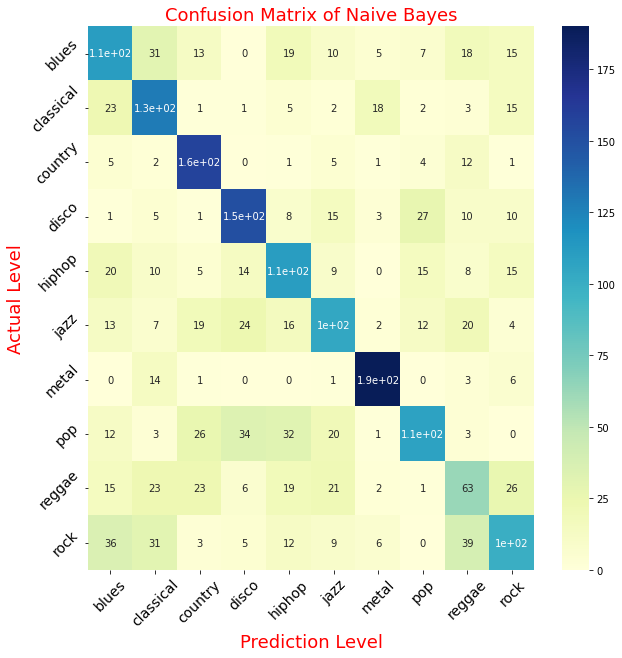

In [ ]:
# Plotting the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
x_axis_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'] # labels for x-axis
y_axis_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'] # labels for y-axis
plot=sns.heatmap(confusion,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,cmap="YlGnBu")
plot.set_title('Confusion Matrix of Naive Bayes',fontsize=18,color='red')
plot.set_xlabel('Prediction Level', fontsize=18,color='red')
plot.set_ylabel('Actual Level', fontsize=18,color='red')
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14,rotation=45)
plt.show()

**Decision Tree**

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
dt = DecisionTreeClassifier(labelCol="MusicGenre", featuresCol="scaled_features",impurity='gini', maxDepth=10, maxBins=32)

In [ ]:
dtModel = dt.fit(train)
dtpredictions = dtModel.transform(test)
dtpredictions.show(5)

+----------+--------------------+--------------------+--------------------+----------+
|MusicGenre|     scaled_features|       rawPrediction|         probability|prediction|
+----------+--------------------+--------------------+--------------------+----------+
|       0.0|[2.22840345022533...|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       6.0|
|       0.0|[2.37979629109323...|[45.0,40.0,0.0,4....|[0.17241379310344...|       9.0|
|       0.0|[2.40270880631788...|[45.0,40.0,0.0,4....|[0.17241379310344...|       9.0|
|       0.0|[2.40339106359911...|[19.0,3.0,0.0,0.0...|[0.86363636363636...|       0.0|
|       0.0|[2.45101949922130...|[136.0,4.0,0.0,0....|[0.78612716763005...|       0.0|
+----------+--------------------+--------------------+--------------------+----------+
only showing top 5 rows



In [ ]:
dtevaluator = MulticlassClassificationEvaluator(labelCol='MusicGenre',predictionCol="prediction", metricName='accuracy')
accuracy = dtevaluator.evaluate(dtpredictions)
print("Test accuracy = " , accuracy)
print("Test Error = %g" % (1.0 - accuracy))

Test accuracy =  0.6191780821917808
Test Error = 0.380822


In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

preds_and_labels = dtpredictions.select(['prediction','MusicGenre']).withColumn('MusicGenre', F.col('MusicGenre').cast(FloatType())).orderBy('prediction')
preds_and_labels1 = preds_and_labels.select(['prediction','MusicGenre'])
metrics = MulticlassMetrics(preds_and_labels1.rdd.map(tuple))
confusion=metrics.confusionMatrix().toArray()
print("Confusion Matrix of Music genre classification \n")
print(confusion)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


Confusion Matrix of Music genre classification 

[[113.   8.  11.   2.   8.   4.   1.  14.  12.  41.]
 [  8. 145.   2.   6.   1.   4.   9.   1.  13.  26.]
 [  7.   6. 164.   1.   3.  10.   0.  16.  24.   0.]
 [  1.   2.   1. 149.   7.  11.   0.  11.   6.   8.]
 [  9.   0.   1.   8. 121.   8.   0.  17.  14.  41.]
 [ 11.   4.   4.  13.  12. 102.   1.  22.  16.  16.]
 [  0.  13.   0.   0.   4.   0. 192.   0.   5.  10.]
 [  4.   1.  10.  12.  21.  17.   0. 138.   4.   4.]
 [ 12.  20.  18.  10.  11.  23.   0.  10.  95.  45.]
 [ 23.  16.   1.  19.  16.   6.   2.   6.   9. 137.]]


In [ ]:
acc = metrics.accuracy
f1 = metrics.fMeasure(1.0)
precision = metrics.precision(1.0)
recall = metrics.recall(1.0)
print("                         The Music genre classification result DT\n")
print("Accuracy                         F1-Score                     Precision                      Recall")
print(acc,"          ",f1,"        ",precision,"         ",recall)

                         The Music genre classification result DT

Accuracy                         F1-Score                     Precision                      Recall
0.6191780821917808            0.6744186046511628          0.6744186046511628           0.6744186046511628


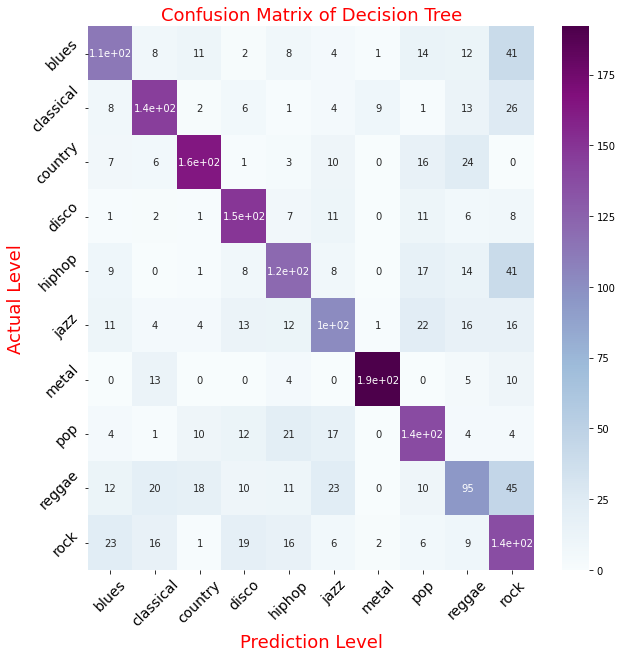

In [ ]:
# Plotting the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
x_axis_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'] # labels for x-axis
y_axis_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'] # labels for y-axis
plot=sns.heatmap(confusion,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,cmap="BuPu")
plot.set_title('Confusion Matrix of Decision Tree',fontsize=18,color='red')
plot.set_xlabel('Prediction Level', fontsize=18,color='red')
plot.set_ylabel('Actual Level', fontsize=18,color='red')
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14,rotation=45)
plt.show()

**Logistic regression**

In [ ]:
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
lr = LogisticRegression(labelCol="MusicGenre", featuresCol="scaled_features",maxIter=200, tol=1E-6, fitIntercept=True)

In [ ]:
# train the multiclass model.
lrModel = lr.fit(train)

In [ ]:

lrpredictions = lrModel.transform(test)
lrpredictions.show(5)

+----------+--------------------+--------------------+--------------------+----------+
|MusicGenre|     scaled_features|       rawPrediction|         probability|prediction|
+----------+--------------------+--------------------+--------------------+----------+
|       0.0|[2.22840345022533...|[1.56976411185715...|[6.96763014359947...|       1.0|
|       0.0|[2.37979629109323...|[5.57697718895692...|[0.03273152375280...|       1.0|
|       0.0|[2.40270880631788...|[9.21337227621541...|[0.98946614740803...|       0.0|
|       0.0|[2.40339106359911...|[10.2905410305102...|[0.89677791260338...|       0.0|
|       0.0|[2.45101949922130...|[14.2048500991496...|[0.99984508641868...|       0.0|
+----------+--------------------+--------------------+--------------------+----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
lrevaluator = MulticlassClassificationEvaluator(labelCol='MusicGenre',predictionCol="prediction", metricName='accuracy')
accuracy = lrevaluator.evaluate(lrpredictions)
print("Test accuracy of logistic regression classifier is  = " , accuracy)
print("Test Error of logistic  regression classifier is  = %g" % (1.0 - accuracy))
#print(rfModel.toDebugString)

Test accuracy of logistic regression classifier is  =  0.7228310502283105
Test Error of logistic  regression classifier is  = 0.277169


In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

preds_and_labels = lrpredictions.select(['prediction','MusicGenre']).withColumn('MusicGenre', F.col('MusicGenre').cast(FloatType())).orderBy('prediction')
preds_and_labels1 = preds_and_labels.select(['prediction','MusicGenre'])
metrics = MulticlassMetrics(preds_and_labels1.rdd.map(tuple))
confusion=metrics.confusionMatrix().toArray()
print("Confusion Matrix of Music genre classification \n")
print(confusion)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


Confusion Matrix of Music genre classification 

[[171.  14.  11.   0.   7.   7.   1.   2.   4.  12.]
 [  6. 168.   0.   2.   1.   1.   9.   2.   3.   7.]
 [  7.   0. 169.   0.   0.   4.   0.   0.   8.   1.]
 [  0.   1.   0. 177.   5.  16.   4.  12.   7.   9.]
 [  8.   2.   0.  10. 139.   8.   0.  16.  15.   9.]
 [  2.   1.   5.  14.   5. 157.   2.   6.  24.   5.]
 [  1.  10.   0.   0.   0.   0. 199.   0.   2.   3.]
 [ 12.   0.  15.  12.  38.  10.   2. 146.   3.   1.]
 [ 11.   1.  11.   6.   7.  26.   0.   1. 115.  21.]
 [ 22.  25.   2.   5.   6.  14.   0.   1.  28. 138.]]


In [ ]:
acc = metrics.accuracy
f1 = metrics.fMeasure(1.0)
precision = metrics.precision(1.0)
recall = metrics.recall(1.0)
print("                         The Music genre classification result for LR\n")
print("Accuracy                          F1-Score                     Precision                      Recall")
print(acc,"          ",f1,"        ",precision,"         ",recall)

                         The Music genre classification result for LR

Accuracy                          F1-Score                     Precision                      Recall
0.7276497695852534            0.7980997624703089          0.7567567567567568           0.8442211055276382


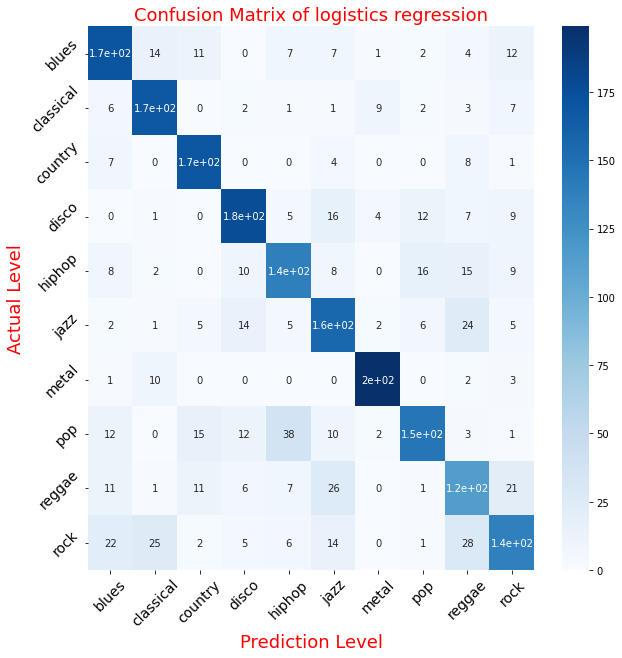

In [ ]:
# Plotting the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
x_axis_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'] # labels for x-axis
y_axis_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'] # labels for y-axis
plot=sns.heatmap(confusion,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,cmap="Blues")
plot.set_title('Confusion Matrix of logistics regression',fontsize=18,color='red')
plot.set_xlabel('Prediction Level', fontsize=18,color='red')
plot.set_ylabel('Actual Level', fontsize=18,color='red')
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14,rotation=45)
plt.show()

**Multilayer Perceptron classifier**

In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
layers = [17, 9, 8, 10]

In [ ]:
trainer = MultilayerPerceptronClassifier(labelCol="MusicGenre", featuresCol="scaled_features",maxIter=200, layers=layers, blockSize=228, seed=1234)

In [ ]:
# train the model
mlmodel = trainer.fit(train)

In [ ]:

mlpredictions = mlmodel.transform(test)
mlpredictions.show(5)

+----------+--------------------+--------------------+--------------------+----------+
|MusicGenre|     scaled_features|       rawPrediction|         probability|prediction|
+----------+--------------------+--------------------+--------------------+----------+
|       0.0|[2.23743476246082...|[0.48663384462670...|[0.03044643766214...|       1.0|
|       0.0|[2.28992139486642...|[2.71771526813331...|[0.19464690940195...|       1.0|
|       0.0|[2.50557466526844...|[1.29901577190548...|[0.05760797467138...|       1.0|
|       0.0|[2.53062282685479...|[3.68703993910290...|[0.26038424811632...|       1.0|
|       0.0|[2.54506053383522...|[2.06785687600601...|[0.15448632483275...|       1.0|
+----------+--------------------+--------------------+--------------------+----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
mlevaluator = MulticlassClassificationEvaluator(labelCol='MusicGenre',predictionCol="prediction", metricName='accuracy')
accuracy = mlevaluator.evaluate(mlpredictions)
print("Test accuracy of Multilayer Perceptron classifier is  = " , accuracy)
print("Test Error of Random Forest classifier is  = %g" % (1.0 - accuracy))
#print(rfModel.toDebugString)

Test accuracy of Multilayer Perceptron classifier is  =  0.5142857142857142
Test Error of Random Forest classifier is  = 0.485714


In [ ]:
# install nbconvert
!pip3 install nbconvert

# convert ipynb to html
# file name: "Music_classification.ipynb
!jupyter nbconvert --to html music_multipleclassifier.ipynb

[NbConvertApp] Converting notebook music_multipleclassifier.ipynb to html
[NbConvertApp] Writing 607250 bytes to music_multipleclassifier.html
